In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
print("Size of the data : ",iris_df.shape)

Size of the data :  (150, 5)


<Axes: xlabel='Sepal_Length', ylabel='Petal_Length'>

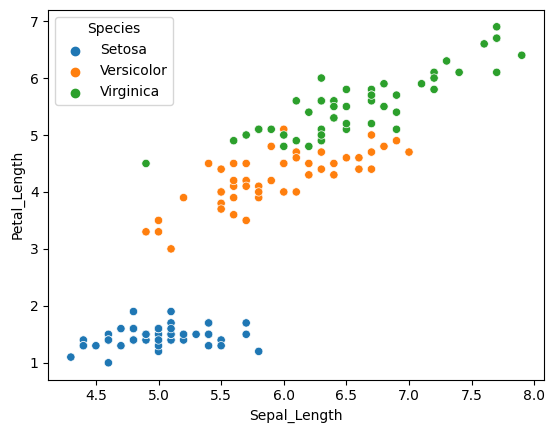

In [5]:
sns.scatterplot(x='Sepal_Length',y='Petal_Length',hue='Species',data=iris_df)

only for practical purpose Here we consider Versicolor and Virginica as a one category and Setosa as other category.
above scatter plot we can say that both the category is lineraly separable.

## Binary Classification

### 1. Setosa vs Non-Setosa

In [6]:
iris_df['s_ns']= np.where(iris_df["Species"]=="Setosa",1,0)

for binary classification we consider Versicolor and Virginica as one category And we define Setosa as 1 and Other than Setosa as 0(For Versicolor and Virginica)

In [7]:
iris_df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,s_ns
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0
146,6.3,2.5,5.0,1.9,Virginica,0
147,6.5,3.0,5.2,2.0,Virginica,0
148,6.2,3.4,5.4,2.3,Virginica,0


<Axes: xlabel='Petal_Length', ylabel='Petal_Width'>

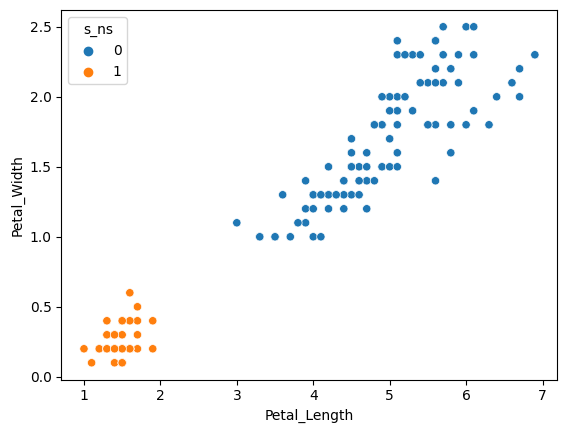

In [8]:
sns.scatterplot(x = iris_df["Petal_Length"], y = iris_df["Petal_Width"],data = iris_df, hue = "s_ns")

1 as Setosa and 0 as non-Setosa

In [9]:
X = iris_df[["Petal_Length","Petal_Width"]]
y = iris_df["s_ns"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.svm import SVC

In [12]:
linear_svm = SVC(kernel = "linear")
linear_svm.fit(X_train,y_train)

SVC(kernel='linear')

In [13]:
predictions_test = linear_svm.predict(X_test)
predictions_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1])

In [14]:
predictions_train = linear_svm.predict(X_train)
predictions_train

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print("Linear SVM Accuracy :",accuracy_score(y_train,predictions_train))

Linear SVM Accuracy : 1.0


In [17]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Decision boundary of linear SVM')

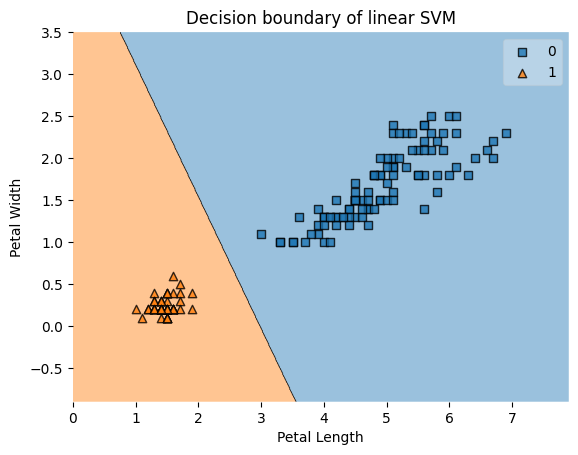

In [18]:
plot_decision_regions(X.values,y.values,clf = linear_svm)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision boundary of linear SVM")

### 2. Versicolor vs Non-versicolor

In [19]:
iris_df['v_nv']= np.where(iris_df["Species"]=="Versicolor",1,0)

In [20]:
iris_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,s_ns,v_nv
0,5.1,3.5,1.4,0.2,Setosa,1,0
1,4.9,3.0,1.4,0.2,Setosa,1,0
2,4.7,3.2,1.3,0.2,Setosa,1,0
3,4.6,3.1,1.5,0.2,Setosa,1,0
4,5.0,3.6,1.4,0.2,Setosa,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0,0
146,6.3,2.5,5.0,1.9,Virginica,0,0
147,6.5,3.0,5.2,2.0,Virginica,0,0
148,6.2,3.4,5.4,2.3,Virginica,0,0


for binary classification we consider Setosa and Virginica as one category And we define Versicolor as 1 and Other than Versicolor as 0(For Setosa and Virginica)

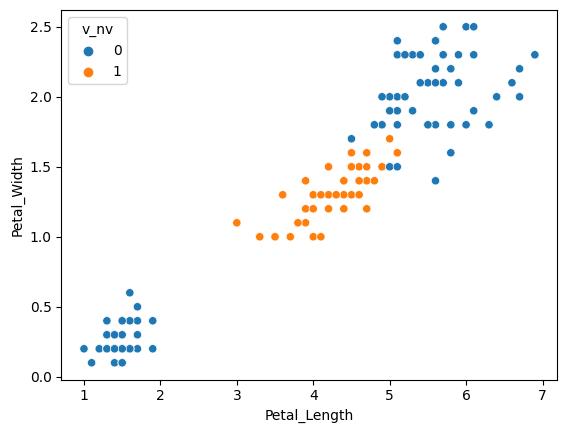

In [21]:
sns.scatterplot(x = iris_df["Petal_Length"], y = iris_df["Petal_Width"],data = iris_df, hue = "v_nv")
plt.show()

1 as Versicolor and 0 other than Versicolor

In [22]:
X = iris_df[["Petal_Length","Petal_Width"]]
y = iris_df["v_nv"]

### a. Using Linear Kernel

In [23]:
linear_svm = SVC(kernel = "linear")
linear_svm.fit(X,y)

SVC(kernel='linear')

In [24]:
predictions = linear_svm.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Linear SVM Accuracy : ",accuracy_score(y, predictions))

Linear SVM Accuracy :  0.6666666666666666


Text(0.5, 1.0, 'Decision boundary of linear SVM')

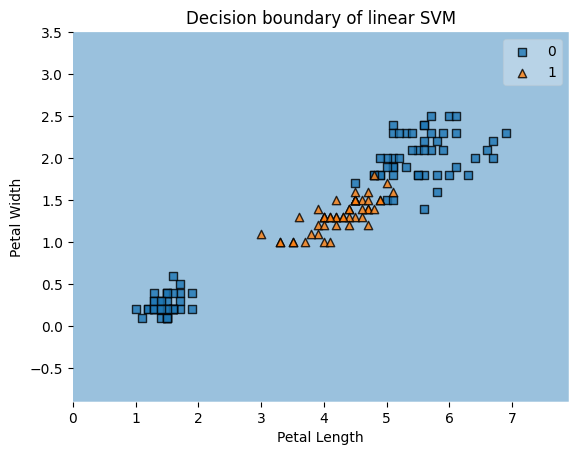

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.ravel(),clf = linear_svm)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision boundary of linear SVM")

### b. Using Polynomial Kernel

In [28]:
poly_svm = SVC(kernel = "poly")
poly_svm.fit(X,y)
predictions = poly_svm.predict(X)

In [29]:
print("Polynomial SVM Accuracy : ", accuracy_score(y, predictions))

Polynomial SVM Accuracy :  0.6666666666666666


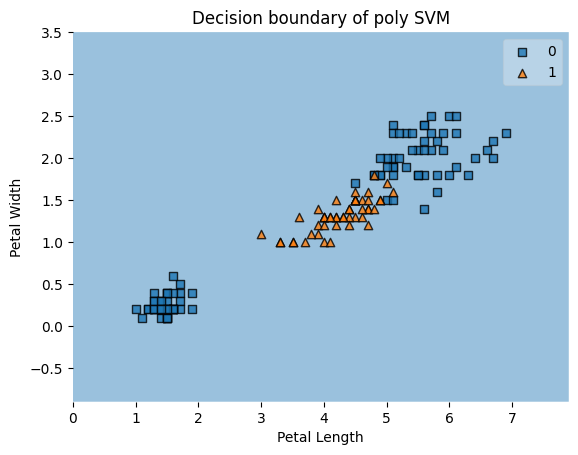

In [30]:
plot_decision_regions(X.values,y.values,clf = poly_svm)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision boundary of poly SVM")
plt.show()

### c. Using Radial Kernel

In [31]:
rbf_svm = SVC(kernel = "rbf")
rbf_svm.fit(X,y)

SVC()

In [32]:
predictions = rbf_svm.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
print("RBF SVM Accuracy :",accuracy_score(y,predictions))

RBF SVM Accuracy : 0.9533333333333334


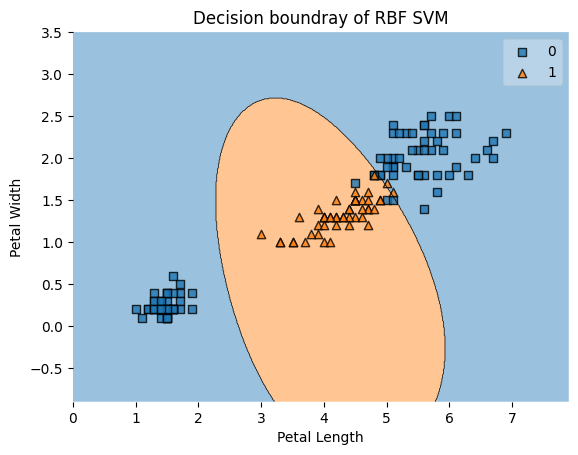

In [34]:
plot_decision_regions(X.values,y.ravel(),clf = rbf_svm)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision boundray of RBF SVM")
plt.show()

## Multi-Class Classification

In [35]:
iris_df['Species'].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [36]:
species_numeric = []
for i in iris_df['Species']:
    if(i=='Setosa'):
        species_numeric.append(0)
    elif(i=="Versicolor"):
        species_numeric.append(1)
    else:
        species_numeric.append(2)

the species_numeric list will contain numeric representations of the species:

'Setosa' → 0
'Versicolor' → 1
'Virginica' → 2

In [37]:
iris_df["Species_numeric"] = species_numeric

In [38]:
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,s_ns,v_nv,Species_numeric
0,5.1,3.5,1.4,0.2,Setosa,1,0,0
1,4.9,3.0,1.4,0.2,Setosa,1,0,0
2,4.7,3.2,1.3,0.2,Setosa,1,0,0
3,4.6,3.1,1.5,0.2,Setosa,1,0,0
4,5.0,3.6,1.4,0.2,Setosa,1,0,0


In [39]:
X = iris_df[["Petal_Length","Petal_Width"]]
y = iris_df["Species_numeric"]

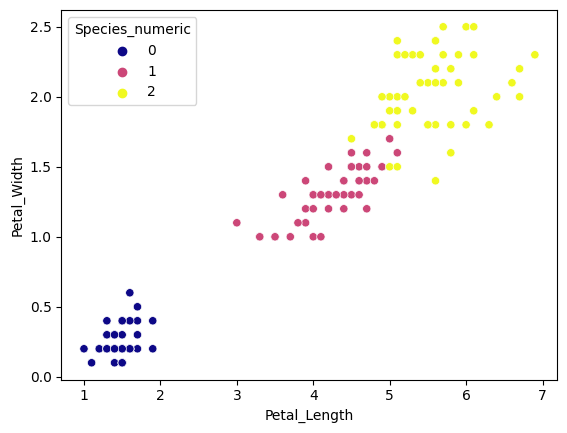

In [40]:
sns.scatterplot(x = iris_df["Petal_Length"], y = iris_df["Petal_Width"],data = iris_df, hue = "Species_numeric",palette='plasma')
plt.show()

### a. Using RBF Kernel

In [41]:
rbf_multi_svm = SVC(kernel = "rbf")
rbf_multi_svm.fit(X,y)

SVC()

In [42]:
predictions = rbf_multi_svm.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [43]:
print("Rbf multiclass SVM Accuracy :",accuracy_score(y,predictions))

Rbf multiclass SVM Accuracy : 0.9533333333333334


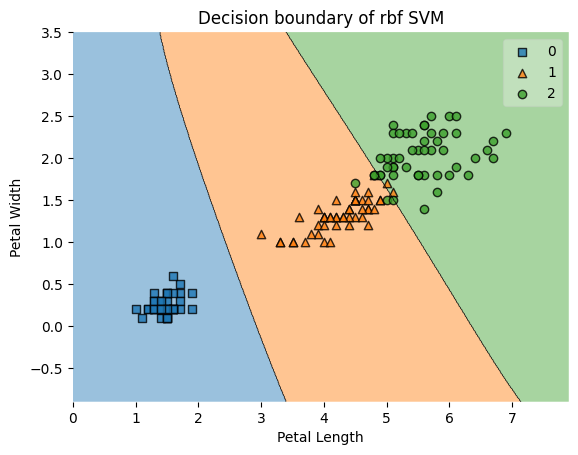

In [44]:
plot_decision_regions(X.values,y.values,clf = rbf_multi_svm)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision boundary of rbf SVM")
plt.show()

### b. Using Polynomial Kernel

In [45]:
poly_multi_svm = SVC(kernel = "poly")
poly_multi_svm.fit(X,y)

SVC(kernel='poly')

In [46]:
predictions = poly_multi_svm.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [47]:
print("Poly multiclass SVM Accuracy :",accuracy_score(y,predictions))

Poly multiclass SVM Accuracy : 0.9666666666666667


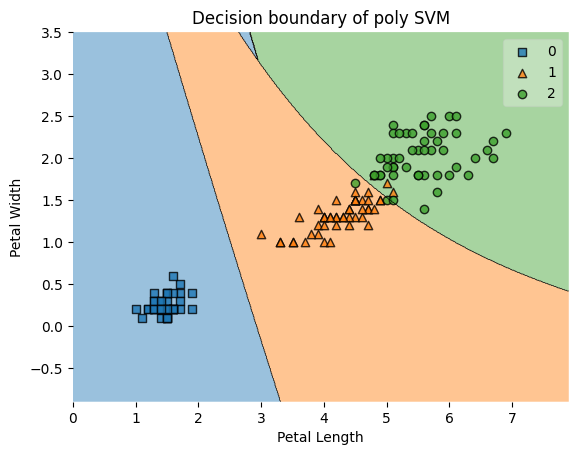

In [48]:
plot_decision_regions(X.values,y.values,clf = poly_multi_svm)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision boundary of poly SVM")
plt.show()

## Model Performance Analysis

In this analysis, we evaluated different kernel functions for classification of species in the Iris dataset.

- **For Binary Classification (Setosa vs. Versicolor):** 
  - The Radial Basis Function (RBF) kernel demonstrated superior performance, effectively capturing the non-linear relationships between the features.

- **For Multi-class Classification (Setosa, Versicolor, Virginica):**
  - The Polynomial kernel showed better results, effectively handling the complexities of classifying among the three species.


##  Turning the Hyperparameter C

##### For visuilazation purpose we use dummy data to see the difference. when c changes how boundries changes

In [50]:
dummy_df = pd.read_csv("dummy.csv")
dummy_df.head()

,x1,x2,y
0,4.7,1.4,1
1,4.5,1.5,1
2,4.0,1.3,1
3,4.6,1.5,1
4,4.5,1.3,1


In [51]:
print("Size of dummy data :", dummy_df.shape)

Size of dummy data : (88, 3)


In [52]:
X = dummy_df[["x1","x2"]]
y = dummy_df["y"]

<Axes: xlabel='x1', ylabel='x2'>

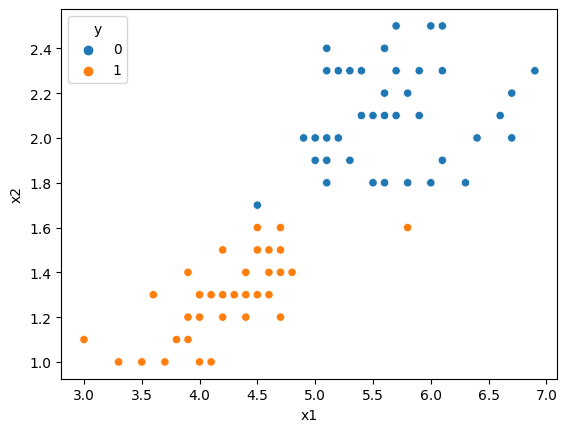

In [53]:
sns.scatterplot(x = dummy_df["x1"],y = dummy_df["x2"],data = dummy_df, hue ="y")

### Model 1 - Using default value of C=1.0

In [54]:
linear_svm = SVC(kernel="linear")
linear_svm.fit(X,y)
predictions = linear_svm.predict(X)
print("Linear SVM Accuracy : ", accuracy_score(y,predictions))

Linear SVM Accuracy :  0.9772727272727273


In [55]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


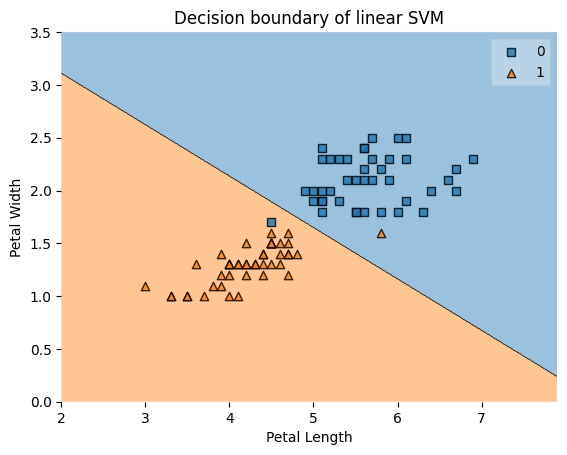

In [56]:
plot_decision_regions(X.values,y.ravel(),clf = linear_svm)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision boundary of linear SVM")
plt.show()

### Model 2 - Using default value of C=10

In [57]:
linear_svm = SVC(kernel="linear",C=10)
linear_svm.fit(X,y)
predictions = linear_svm.predict(X)
print("Linear SVM Accuracy : ", accuracy_score(y,predictions))

Linear SVM Accuracy :  0.9772727272727273


In [58]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

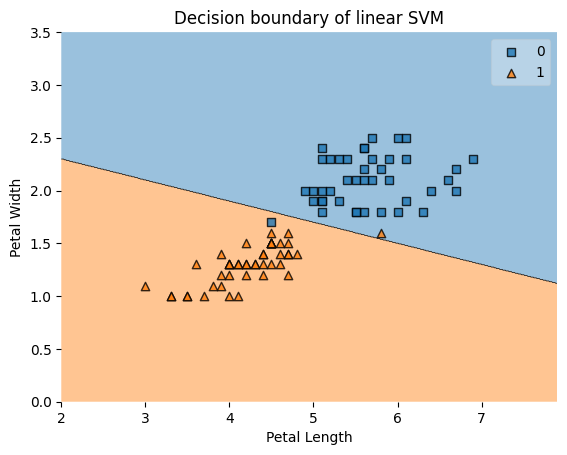

In [60]:
# plot_decision_regions(X.values,y.ravel(),clf = linear_svm)
plot_decision_regions(X.values, y.ravel(), clf=linear_svm)
                # This function visualizes the decision boundaries and how they change based on the model's hyperparameters.
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision boundary of linear SVM")
plt.show()

### Model 3 - Using default value of C=100

In [61]:
linear_svm = SVC(kernel="linear",C=100)
linear_svm.fit(X,y)
predictions = linear_svm.predict(X)
print("Linear SVM Accuracy : ", accuracy_score(y,predictions))

Linear SVM Accuracy :  1.0


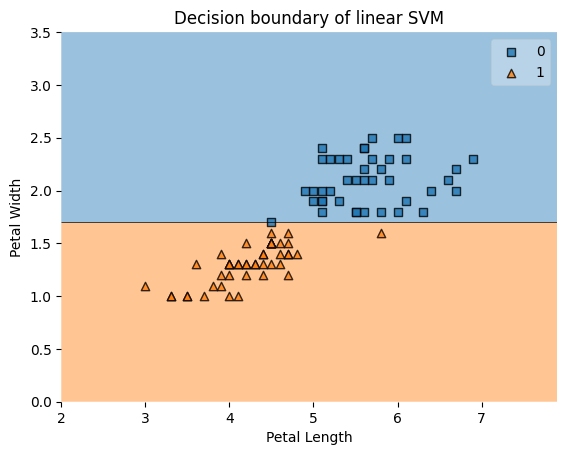

In [62]:
plot_decision_regions(X.values, y.ravel(), clf=linear_svm)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision boundary of linear SVM")
plt.show()

**Hyperparameter Tuning Results:**

In this analysis, we tested different values for the hyperparameter **C** in the Support Vector Classifier (SVC):
- **C = 1.0**
- **C = 10**
- **C = 100**

Notably, when **C** was set to **100**, the model achieved **100% accuracy** on the training data, indicating that it perfectly classified all training samples. This suggests that a higher value of **C** allows the model to minimize misclassifications effectively. However, it's important to remain cautious, as such high accuracy could indicate a risk of overfitting to the training data.


## Using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'C':[0.1,1,10,50,100]}

In [65]:
grid = GridSearchCV(SVC(kernel = 'linear'), param_grid, refit= True,verbose =3)
grid.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.944 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.941 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.944 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.941 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.944 total time=   0.0s
[CV 2/5] END ..............................C=10;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 50, 100]}, verbose=3)

In [66]:
print(grid.best_params_)

{'C': 50}


In [67]:
print(grid.best_estimator_)

SVC(C=50, kernel='linear')


In [68]:
rang=list(range(1,100,2))
rang

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":list(range(1,100,2))}
grid=GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...............................C=1;, score=0.944 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.941 total time=   0.0s
[CV 1/5] END ...............................C=3;, score=0.944 total time=   0.0s
[CV 2/5] END ...............................C=3;, score=1.000 total time=   0.0s
[CV 3/5] END ...............................C=3;, score=1.000 total time=   0.0s
[CV 4/5] END ...............................C=3;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=3;, score=0.941 total time=   0.0s
[CV 1/5] END ...............................C=5;, score=0.944 total time=   0.0s
[CV 2/5] END ...............................C=5

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25,
                               27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49,
                               51, 53, 55, 57, 59, ...]},
             verbose=3)